In [1]:
###TensorFlow
import pandas as pd
import os 
import tensorflow as tf
import numpy as np


In [2]:
directory= "C:/Users/sergi/Documents/Py"
os.chdir(directory)

In [3]:
# Load the MNIST dataset from Keras
mnist = tf.keras.datasets.mnist

# Split into training and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
(x_train2, y_train2), (x_test2, y_test2) = mnist.load_data()

#Storing locally an image
# Select an image from the dataset (e.g., the first image)
image = x_train[0]


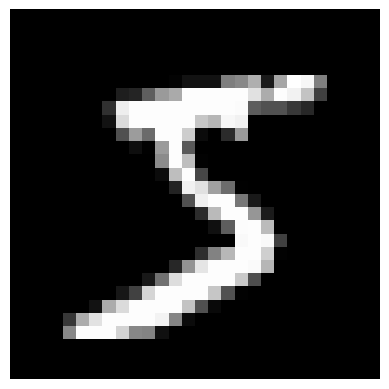

the image corresponds to a 5


In [4]:
###MNIST input variable example
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Load the image
# img = mpimg.imread('mnist_image.png')

# Display the image
plt.imshow(image, cmap='gray')
plt.axis('off')  # Optional: turn off the axis
plt.show()
print(f"the image corresponds to a {y_train[0]}")

In [5]:
##We are telling we want 3 hidden layers each with 500 nodes. The final output layer will have 10 nodes
layer_1_nodes = 500
layer_2_nodes = 500
layer_3_nodes = 500
output_nodes = len(set(y_test))

In [6]:
##One Hot enconding the sets: 
y_train = tf.keras.utils.to_categorical(y_train, len(set(y_train)))#10 Categories 0 to 9 that can be defined as len(set(y_train))
y_test = tf.keras.utils.to_categorical(y_test, len(set(y_test)))
##One hot encoding transforms the variables into different outputs inside a vector. As such our CNN will have 10 outputs. Eg if the output is (0,0,1,0,0,0,0,0,0,0), means that the output is a 2.
#The CNN will be in the format of such vector.


In [7]:
####Defining the hyperparameters of the CNN
learning_rate = 0.0001  ###The change applied on the weights partial derivatives
batch_size = 100 ## We are telling the CNN that every 100 images revalance the weights (this saves memory instead of updating weights for all the set)
update_step = 10 ###   We are telling Python after how many epochs print an update of the training process. In this case after 10 epochs (10 times the whole data goes through the network, or 10 loop)
validation_nr = 0.2##20% of the data will be used for validation

In [8]:
print("Original shape of x_train:", x_train.shape[0],"images with",x_train.shape[1], "x",  x_train.shape[2], "pixels")  

###Defining shape of inpuys
input_shape = ((x_train.shape[1]*x_train.shape[2],))  # Flattened input images 784 or 28 pixels x 28 pixels 


Original shape of x_train: 60000 images with 28 x 28 pixels


In [9]:
##We are transforming the input variables into vectors
x_train = x_train.reshape(-1, 28 * 28).astype('float32') # Reshape transform into vectors an then we transform each of the vector elements into a 32 byte float 
x_test = x_test.reshape(-1, 28 * 28).astype('float32')

In [10]:
# Create a CNN model

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=input_shape),  # Input layer
    tf.keras.layers.Dense(layer_1_nodes, activation='relu'),  # Hidden layer with 500 units with relu or sigmoid functions
    tf.keras.layers.Dense(layer_2_nodes, activation='relu'),  # Hidden layer with 500 units with relu or sigmoid functions
    tf.keras.layers.Dense(layer_3_nodes, activation='relu'),  # Hidden layer with 500 units with relu or sigmoid functions
    tf.keras.layers.Dense(output_nodes, activation='softmax')  # Output layer with softmax activation with softmax
])


# ReLU (Rectified Linear Unit) is an activation function that outputs zero for negative inputs and the input value itself for positive inputs. It is widely used in hidden layers of neural networks due to its efficiency and ability to avoid the vanishing gradient problem.
# Sigmoid is an activation function that maps inputs to an output between 0 and 1, making it suitable for binary classification tasks but less effective for deep networks due to its tendency to cause vanishing gradients.
# softmax;: The softmax activation function is used primarily in the output layer of a neural network to convert raw logits (scores) into probabilities. It is defined as:
#softmat functio Z(i)= e(x i)/sum of i (e(x)) where i is each of the differenty final hidden layers outputs
 



In [11]:
# Compile the model
optimizer_SGD= tf.keras.optimizers.SGD(learning_rate=learning_rate)


model.compile(optimizer=optimizer_SGD, 
              loss='categorical_crossentropy',    ## Btter than MSE  thus is - sum z(i)*log(pi) where Pi is the softmax output and yi is the real output
              metrics=['accuracy'])   ##Accuracy as our main goodness of fit measure  


##Other Loss functions include: 
# Sparce Categorical Cross-Entropy: better used when output target are integers and not one hot encoded vectors: sparse_categorical_crossentropy
# KL Divergence: Measures how one probability distribution diverges from a second, expected probability distribution = sum p(i)* log(pi/qi): kld
# Binary Cross-Entropy: Better used 1 or 0 output: binary_crossentropy
#MAE: regressions: "mae"
# MSE: regressions: mse

##Custom loss functions: 
# def custom_loss(y_true, y_pred):
#     return tf.reduce_mean(tf.square(y_true - y_pred))  # Example: Mean Squared Error
#loss= custom_loss

#Optimisers rather than adam_ 
#Stochastic Gradient Descent (SGD)
#  tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True) Momentum is optional nesterov=True is also optional
#adam includes momentum and variances on the weight optimisation


In [12]:
# Fitting the model
CNN_fit = model.fit(
    x_train, y_train,          # Training data and labels
    epochs=30,                 # Number of epochs
    batch_size=batch_size,             # Mini-batch size
    validation_split=validation_nr       # Fraction of training data to be used for validation
)


Epoch 1/30
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6460 - loss: 9.0116 - val_accuracy: 0.8643 - val_loss: 1.9462
Epoch 2/30
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8720 - loss: 1.6343 - val_accuracy: 0.8898 - val_loss: 1.3556
Epoch 3/30
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8997 - loss: 1.1609 - val_accuracy: 0.8968 - val_loss: 1.1780
Epoch 4/30
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9165 - loss: 0.8237 - val_accuracy: 0.9046 - val_loss: 1.0145
Epoch 5/30
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9239 - loss: 0.6717 - val_accuracy: 0.9113 - val_loss: 0.9467
Epoch 6/30
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9355 - loss: 0.5668 - val_accuracy: 0.9163 - val_loss: 0.8877
Epoch 7/30
480/480 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9407 - loss: 0.4693 - val_accuracy: 0.9188 - val_loss: 0.8282
Epoch 8/30
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9465 - loss: 0.4049 - val_accuracy: 0

In [13]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {test_loss}') ###Loss value on th last dataset
print(f'Test Accuracy: {test_accuracy}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9174 - loss: 0.7839
Test Loss: 0.6654059886932373
Test Accuracy: 0.9284999966621399


In [14]:
# Make predictions
predictions = model.predict(x_test)

# Example: Print the first prediction
print(f'First prediction: {predictions[0]}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
First prediction: [1.5043760e-16 2.7625313e-23 4.6852031e-18 6.2481568e-08 1.6448243e-25
 2.2771174e-15 4.8678571e-36 9.9999988e-01 2.1390444e-18 2.3754182e-22]


In [15]:
##Transforming Prediction into numbers

def output_CNN(x):
    def roundes(y):
        y=list(y)
        return y.index(max(y))
    outputs = []
    for i in x:
        xx = roundes(i)  # Get the index of 1 in the rounded list
        outputs.append(xx)  # Append the result to outputs
    return outputs

Outputs_test=output_CNN(predictions)
Outputs_train=output_CNN(model.predict(x_train))

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


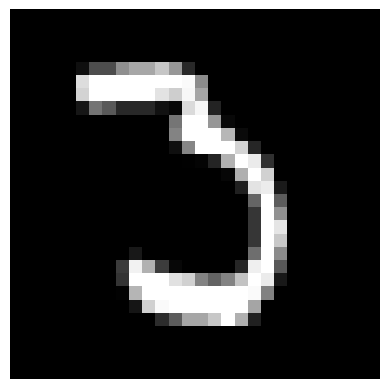

the CNN predict the image as 3


In [18]:
####Last step is to check if the CNN correctly predicts a random image of the databank
import random

imagetoshow= random.randint(1, len(Outputs_test))
image_test=x_test2[imagetoshow]
plt.imshow(image_test, cmap='gray')
plt.axis('off')  # Optional: turn off the axis
plt.show()
print(f"the CNN predict the image as {Outputs_test[imagetoshow]}")
